# Hierarchical Clustering 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

### Import the dataset

In [2]:
carData = pd.read_csv('data.csv') 
carData.head(3)

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Please give us any design ideas to make the car uniquely Singaporean.
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",NaN
1,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own",NaN


In [3]:
carData.shape

(50, 13)

## Data Cleaning

### Remove unnecessary columns

In [4]:
columns_to_drop = ["Which category do you currently belong to?", "How likely are you to opt for customised vehicle if there were no extra charges? ", "How much are you willing to pay for the personalised design? ", "Please give us any design ideas to make the car uniquely Singaporean.", "Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)", "What is your gender?","Which of the following best describes you?", 'Are you interested in designing your own components to personalise your car? ' ]
cleanData = carData.drop(columns=columns_to_drop)
cleanData.head(3)

,Which age group do you belong to?,Which of these factors are important to you when deciding which car to purchase?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?
0,20-30,Price;Functionality;Size;Customisable options,Grilles,Centre compartment,100-500
1,20-30,Price;Brand name;Aesthetics;Technological feat...,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500
2,20-30,Aesthetics;Functionality;Customisable options,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000


In [5]:
import pandas as pd

age_mapping = {'20-30': 1, '31-40': 2, '41-50': 3, '51-60': 4, '61-70': 5, '71+': 6}
cleanData['Age Group'] = cleanData['Which age group do you belong to?'].map(age_mapping)

# Reorder columns w
cleanData = cleanData[['Age Group'] + [col for col in cleanData.columns if col != 'Age Group']]

# Drop 'Which age group do you belong to?'
cleanData.drop('Which age group do you belong to?', axis=1, inplace=True)

# Display the updated DataFrame
cleanData.head(3)

,Age Group,Which of these factors are important to you when deciding which car to purchase?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?
0,1,Price;Functionality;Size;Customisable options,Grilles,Centre compartment,100-500
1,1,Price;Brand name;Aesthetics;Technological feat...,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500
2,1,Aesthetics;Functionality;Customisable options,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000


In [6]:
cleanData.columns

Index(['Age Group',
       'Which of these factors are important to you when deciding which car to purchase?',
       'Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ',
       'Which of the following interior components would you choose to customise (texture, layout, size, etc)? ',
       'How much are you willing to spend on car customisation if surcharges are applicable?'],
      dtype='object')

### Separate different factors

In [48]:
columns_to_drop = ['Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ',
       'Which of the following interior components would you choose to customise (texture, layout, size, etc)? ',  ]

factorData = cleanData.drop(columns=columns_to_drop)
factorData.head(3)

,Age Group,Which of these factors are important to you when deciding which car to purchase?,How much are you willing to spend on car customisation if surcharges are applicable?
0,1,Price;Functionality;Size;Customisable options,100-500
1,1,Price;Brand name;Aesthetics;Technological feat...,under 500
2,1,Aesthetics;Functionality;Customisable options,500-1000


In [49]:
# Extract the relevant columns to split
categories_columns = ['Which of these factors are important to you when deciding which car to purchase?']

# Iterate over each category column (one-hot enconding)
for column in categories_columns:
    category_dummies = factorData[column].str.get_dummies(';') 
    
  
    # Concatenate the one-hot encoded columns to the original DataFrame
    factorData= pd.concat([factorData, category_dummies], axis=1)

# Drop the original multi-category columns
factorData = factorData.drop(categories_columns, axis=1)

# Display the modified DataFrame
factorData.head(3)


,Age Group,How much are you willing to spend on car customisation if surcharges are applicable?,Aesthetics,Brand name,Customisable options,Functionality,Price,Size,Sustainability/environment considerations,Technological features
0,1,100-500,0,0,1,1,1,1,0,0
1,1,under 500,1,1,0,1,1,1,1,1
2,1,500-1000,1,0,1,1,0,0,0,0


### Separate different exteriors

In [9]:
columns_to_drop = [ 'Which of these factors are important to you when deciding which car to purchase?',
       'Which of the following interior components would you choose to customise (texture, layout, size, etc)? ']

exteriorData = cleanData.drop(columns=columns_to_drop)
exteriorData.head(3)

,Age Group,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?
0,1,Grilles,100-500
1,1,Wheels;Grilles;Headlights;Side mirrors,under 500
2,1,Wheels;Grilles;Headlights;Side mirrors,500-1000


In [10]:
# Extract the relevant columns to split
categories_columns = ['Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ']

# Iterate over each category column (one-hot enconding)
for column in categories_columns:
    category_dummies = exteriorData[column].str.get_dummies(';') 
  
    # Concatenate the one-hot encoded columns to the original DataFrame
    exteriorData= pd.concat([exteriorData, category_dummies], axis=1)

# Drop the original multi-category columns
exteriorData = exteriorData.drop(categories_columns, axis=1)

# Display the modified DataFrame
exteriorData.head(3)

,Age Group,How much are you willing to spend on car customisation if surcharges are applicable?,Brakes,Bumpers,Grilles,Headlights,Side mirrors,Wheels,add body kit and change the exhaust and tune the engine,doors
0,1,100-500,0,0,1,0,0,0,0,0
1,1,under 500,0,0,1,1,1,1,0,0
2,1,500-1000,0,0,1,1,1,1,0,0


### Separate different interiors

In [11]:
columns_to_drop = [ 'Which of these factors are important to you when deciding which car to purchase?',
       'Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ']

interiorData = cleanData.drop(columns=columns_to_drop)
interiorData.head(3)

,Age Group,"Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?
0,1,Centre compartment,100-500
1,1,Centre compartment,under 500
2,1,Steering wheel;Dashboard,500-1000


In [12]:
# Extract the relevant columns to split
categories_columns = ['Which of the following interior components would you choose to customise (texture, layout, size, etc)? ']

# Iterate over each category column (one-hot enconding)
for column in categories_columns:
    category_dummies = interiorData[column].str.get_dummies(';') 
    
    # Concatenate the one-hot encoded columns to the original DataFrame
    interiorData= pd.concat([interiorData, category_dummies], axis=1)

# Drop the original multi-category columns
interiorData = interiorData.drop(categories_columns, axis=1)

# Display the modified DataFrame
interiorData.head(3)

,Age Group,How much are you willing to spend on car customisation if surcharges are applicable?,Centre compartment,Dashboard,Door handles,Steering wheel,Sun blocker for front passengers,air vent
0,1,100-500,1,0,0,0,0,0
1,1,under 500,1,0,0,0,0,0
2,1,500-1000,0,1,0,1,0,0


## Clustering of Factors

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

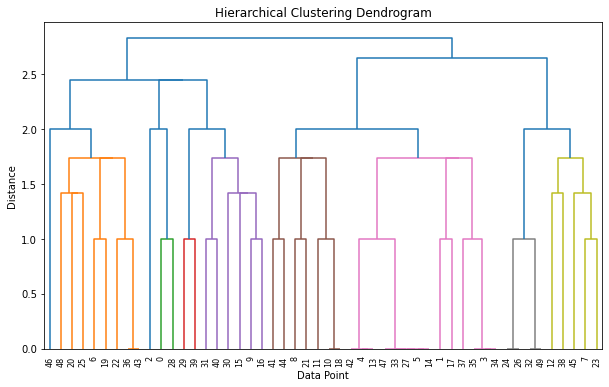

Cluster Assignments:
[2 4 2 4 4 4 1 5 4 3 4 4 5 4 4 3 3 4 4 1 1 4 1 5 5 1 5 4 2 3 3 3 5 4 4 4 1
 4 5 3 3 4 4 1 4 5 1 4 1 5]


In [54]:
# Exclude the first two columns (Age Group and Spending Range)
data_without_age_income = factorData.iloc[:, 2:]

# Hierarchical clustering
linkage_matrix = linkage(data_without_age_income, method='complete', metric='euclidean')

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=factorData.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels based on a threshold or number of clusters
threshold = 2  # adjust as needed
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

print("Cluster Assignments:")
print(clusters)

In [55]:
# Silhouette Score
silhouette_avg = silhouette_score(data_without_age_income, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Cophenetic Correlation Coefficient
coph_corr, _ = cophenet(linkage_matrix, pdist(data_without_age_income))
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

Silhouette Score: 0.16675817939869161
Cophenetic Correlation Coefficient: 0.6539436732843917


### Analysis

- The cluster assignments show five distinct clusters.
- The Silhouette Score of approximately 0.17 indicates a moderate level of separation between clusters
- The Cophenetic Correlation Coefficient of about 0.65 suggests a moderate fidelity in preserving pairwise distances through hierarchical clustering. 

Five clusters imply that there are five distinct groups of people who consider the same set of factors when buying a car. However, the low silhoutte score indicates the level of distinction between the groups to be low - this means that majority of the feature subsets overlap between the five clusters.

## Clustering of Interior Preferences

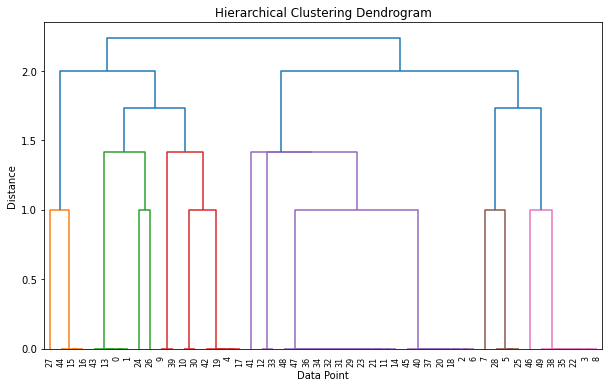

Cluster Assignments:
[ 2  2  7 10  5  9  7  9 10  4  5  7  6  2  7  1  1  5  7  5  7  7 10  7
  3  9  3  1  9  7  5  7  7  6  7 10  7  7 10  4  7  8  5  2  1  7 10  7
  7 10]


In [70]:
# Exclude the first two columns (Age Group and Spending Range)
data_without_age_income = interiorData.iloc[:, 2:]

# Hierarchical clustering
linkage_matrix = linkage(data_without_age_income, method='complete', metric='euclidean')

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=interiorData.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels based on a threshold or number of clusters
threshold = 1.4  # adjust as needed
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

print("Cluster Assignments:")
print(clusters)

In [71]:
# Silhouette Score
silhouette_avg = silhouette_score(data_without_age_income, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Cophenetic Correlation Coefficient
coph_corr, _ = cophenet(linkage_matrix, pdist(data_without_age_income))
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

Silhouette Score: 0.5973951543814209
Cophenetic Correlation Coefficient: 0.8524621349855422


### Analysis

- The cluster assignments show 10 distinct clusters.
- The Silhouette Score of approximately 0.60 indicates a relatively high level of separation between clusters
- The Cophenetic Correlation Coefficient of about 0.85 suggests a high fidelity in preserving pairwise distances through hierarchical clustering. 

Ten clusters imply that there are ten distinct groups of people who consider the same set of interior features when buying a car. Combined with the relatively high silhoutte score, apriori algorithm can be further used to understand the influence the different interior features exhibit on one another.

## Clustering of Exterior Features

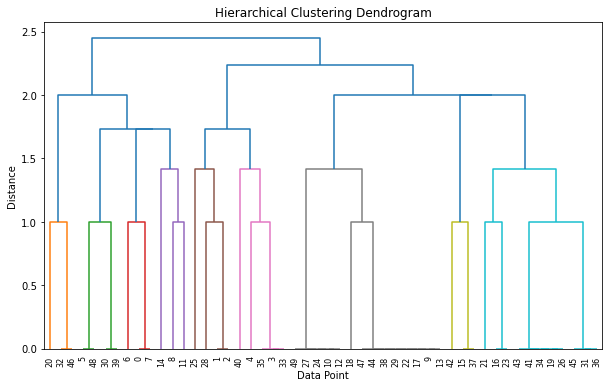

Cluster Assignments:
[ 3  6  6  8  8  2  3  3  4 11 10  4 10 11  5 12 13 11 11 14  1 13 11 13
 10  7 14 10  6 11  2 14  1  8 14  8 14 12 11  2  9 14 12 14 11 14  1 11
  2 10]


In [84]:
# Exclude the first two columns (Age Group and Spending Range)
data_without_age_income = exteriorData.iloc[:, 2:]

# Hierarchical clustering
linkage_matrix = linkage(data_without_age_income, method='complete', metric='euclidean')

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=exteriorData.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels based on a threshold or number of clusters
threshold = 1.4  # adjust as needed
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

print("Cluster Assignments:")
print(clusters)

In [85]:
# Silhouette Score
silhouette_avg = silhouette_score(data_without_age_income, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Cophenetic Correlation Coefficient
coph_corr, _ = cophenet(linkage_matrix, pdist(data_without_age_income))
print(f"Cophenetic Correlation Coefficient: {coph_corr}")

Silhouette Score: 0.5309524478997747
Cophenetic Correlation Coefficient: 0.7688523329724083


### Analysis

- The cluster assignments show 14 distinct clusters.
- The Silhouette Score of approximately 0.53 indicates a relatively high level of separation between clusters
- The Cophenetic Correlation Coefficient of about 0.77 suggests a high fidelity in preserving pairwise distances through hierarchical clustering. 

Fourteen clusters imply that there are fourteen distinct groups of people who consider the same set of exterior features when buying a car. Combined with the relatively high silhoutte score, apriori algorithm can be further used to understand the influence the different exterior features exhibit on one another.